In [1]:
import numpy
import pandas

from matplotlib import pyplot
%matplotlib inline
import seaborn

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow
import keras
from tensorflow.keras import layers, models, metrics, callbacks

RANDOM_STATE = 20

In [2]:
ROOT = '/kaggle/input/petfinder-pawpularity-score/'

def read_csv(file):
    return pandas.read_csv(ROOT + file + '.csv', sep=',')

In [3]:
df = read_csv('train')

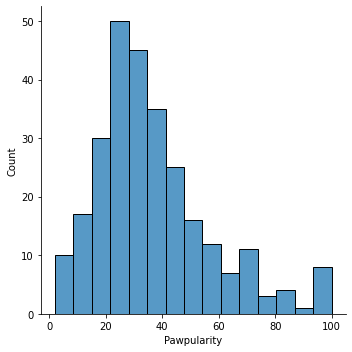

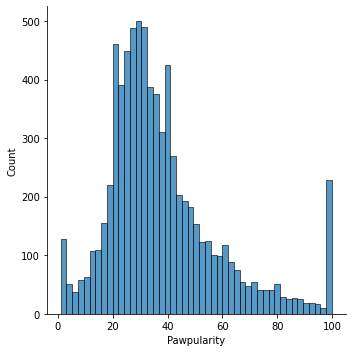

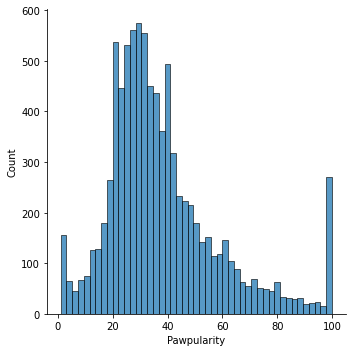

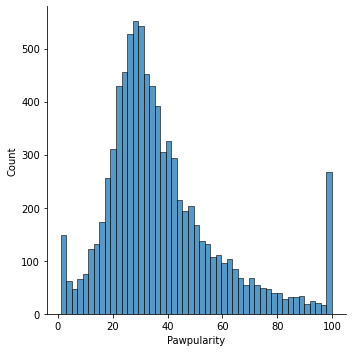

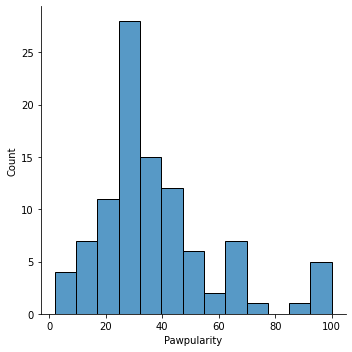

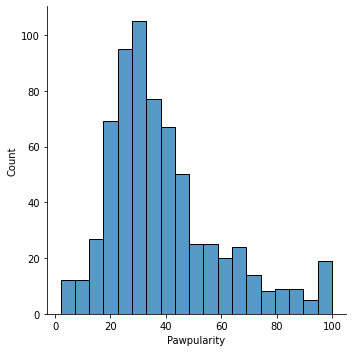

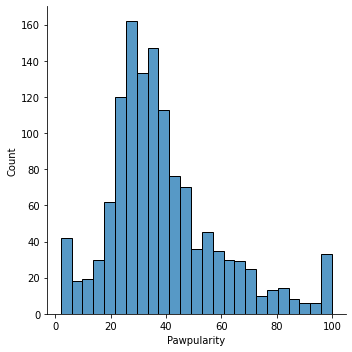

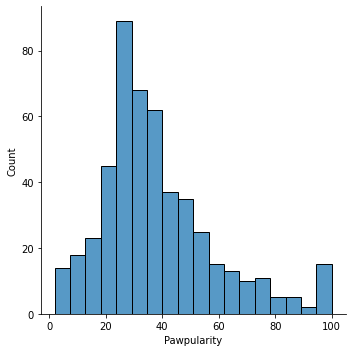

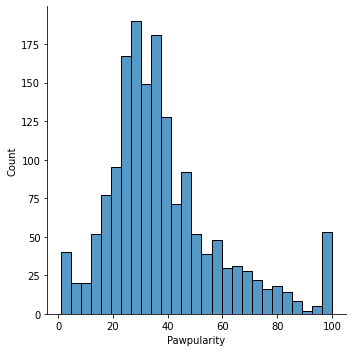

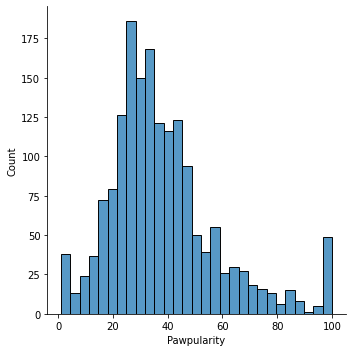

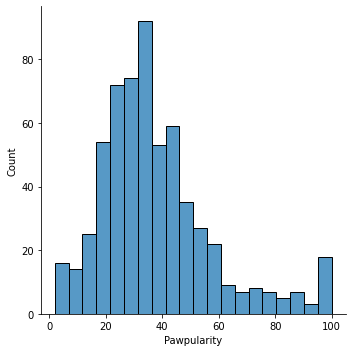

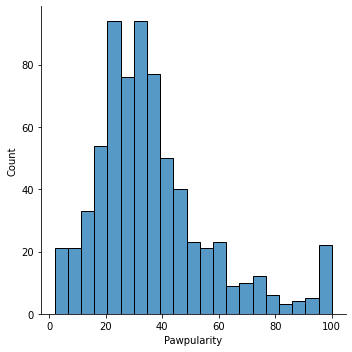

In [4]:
signs = [
    'Subject Focus',
    'Eyes',
    'Face',
    'Near',
    'Action',
    'Accessory',
    'Group',
    'Collage',
    'Human',
    'Occlusion',
    'Info',
    'Blur',
]
for s in signs:
    seaborn.displot(df.loc[df[s] == 1]['Pawpularity'])
    
#seaborn.displot(numpy.log(df['Pawpularity']))
#seaborn.displot(numpy.log(df['Pawpularity']) / numpy.log(100))

#display(df['Pawpularity'].describe())

In [5]:
def imageNeurons():
    model = models.Sequential()
    n = 32
    i = 128
    
    model.add(layers.Conv2D(n, (3, 3), input_shape=(i, i, 3), padding='valid'))
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(n, (3, 3), padding='valid'))
    model.add(layers.Activation('relu'))
    
    model.add(layers.MaxPooling2D())
    n *= 2
    
    model.add(layers.Conv2D(n, (3, 3), padding='valid'))
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(n, (3, 3), padding='valid'))
    model.add(layers.Activation('relu'))    
    
    model.add(layers.MaxPooling2D())
    n *= 2
    
    model.add(layers.Conv2D(n, (3, 3), padding='valid'))
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(n, (3, 3), padding='valid'))
    model.add(layers.Activation('relu'))    
    
    model.add(layers.MaxPooling2D())
    n *= 2
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(n))
    model.add(layers.Activation('relu'))
    
    model.add(layers.Dropout(0.4))
    
    model.add(layers.Dense(n))
    model.add(layers.Activation('relu'))
    
    model.add(layers.BatchNormalization())
    
    model.add(layers.Dropout(0.4))
    
    model.add(layers.Dense(1))
    model.add(layers.Activation('sigmoid'))
    
    model.compile(optimizer='adam', loss='mse', metrics=[metrics.RootMeanSquaredError(name='rmse')])
    return model

In [6]:
imgs = []
faces = []
y = []
faces_y = []
for _, r in df.iterrows():
    i = tensorflow.image.resize(tensorflow.io.decode_jpeg(tensorflow.io.read_file(ROOT + 'train/' + r['Id'] + '.jpg'), channels=3), [128, 128])
    l = numpy.log(r['Pawpularity']) / numpy.log(100)
    if r['Face'] == 1:
        faces.append(i)
        faces_y.append(l)
    else:
        imgs.append(i)
        y.append(l)

imgs = numpy.array(imgs)
y = numpy.array(y)

faces = numpy.array(faces)
faces_y = numpy.array(faces_y)


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [7]:
imageNeurons = imageNeurons()

train_images, test_images, train_y, test_y = train_test_split(imgs, y, test_size=0.2, random_state=RANDOM_STATE)

stopper = callbacks.EarlyStopping(monitor='val_rmse', patience=10)
history = imageNeurons.fit(train_images, train_y, validation_data=(test_images, test_y), epochs=40, batch_size=256, callbacks=[stopper])

2021-12-29 14:02:36.085173: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40
3/3 [==============================] - 29s 9s/step - loss: 0.1577 - rmse: 0.3971 - val_loss: 0.0809 - val_rmse: 0.2844
Epoch 2/40
3/3 [==============================] - 26s 9s/step - loss: 0.1492 - rmse: 0.3863 - val_loss: 0.0918 - val_rmse: 0.3029
Epoch 3/40
3/3 [==============================] - 26s 9s/step - loss: 0.1365 - rmse: 0.3695 - val_loss: 0.0881 - val_rmse: 0.2968
Epoch 4/40
3/3 [==============================] - 26s 9s/step - loss: 0.1287 - rmse: 0.3587 - val_loss: 0.0379 - val_rmse: 0.1948
Epoch 5/40
3/3 [==============================] - 26s 9s/step - loss: 0.1272 - rmse: 0.3567 - val_loss: 0.0322 - val_rmse: 0.1794
Epoch 6/40
3/3 [==============================] - 26s 9s/step - loss: 0.1100 - rmse: 0.3316 - val_loss: 0.0252 - val_rmse: 0.1587
Epoch 7/40
3/3 [==============================] - 26s 9s/step - loss: 0.1000 - rmse: 0.3162 - val_loss: 0.0251 - val_rmse: 0.1586
Epoch 8/40
3/3 [==============================] - 26s 9s/step - loss: 0.0991 - rmse: 0.314

In [8]:
del imgs

In [9]:
def unique_name():
    model = models.Sequential()
    n = 32
    i = 128
    
    model.add(layers.Conv2D(n, (3, 3), input_shape=(i, i, 3), padding='valid'))
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(n, (3, 3), padding='valid'))
    model.add(layers.Activation('relu'))
    
    model.add(layers.MaxPooling2D())
    n *= 2
    
    model.add(layers.Conv2D(n, (3, 3), padding='valid'))
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(n, (3, 3), padding='valid'))
    model.add(layers.Activation('relu'))    
    
    model.add(layers.MaxPooling2D())
    n *= 2
    
    model.add(layers.Conv2D(n, (3, 3), padding='valid'))
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(n, (3, 3), padding='valid'))
    model.add(layers.Activation('relu'))    
    
    model.add(layers.MaxPooling2D())
    n *= 2
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(n))
    model.add(layers.Activation('relu'))
    
    model.add(layers.Dropout(0.4))
    
    model.add(layers.Dense(n))
    model.add(layers.Activation('relu'))
    
    model.add(layers.BatchNormalization())
    
    model.add(layers.Dropout(0.4))
    
    model.add(layers.Dense(1))
    model.add(layers.Activation('sigmoid'))
    
    model.compile(optimizer='adam', loss='mse', metrics=[metrics.RootMeanSquaredError(name='rmse')])
    return model

In [10]:
facesNeurons = unique_name()

train_images, test_images, train_y, test_y = train_test_split(faces, faces_y, test_size=0.2, random_state=RANDOM_STATE)

stopper = callbacks.EarlyStopping(monitor='val_rmse', patience=10)
history = facesNeurons.fit(train_images, train_y, validation_data=(test_images, test_y), epochs=40, batch_size=256, callbacks=[stopper])

Epoch 1/40
28/28 [==============================] - 240s 9s/step - loss: 0.1264 - rmse: 0.3555 - val_loss: 0.2486 - val_rmse: 0.4986
Epoch 2/40
28/28 [==============================] - 235s 8s/step - loss: 0.0801 - rmse: 0.2830 - val_loss: 0.0346 - val_rmse: 0.1860
Epoch 3/40
28/28 [==============================] - 236s 8s/step - loss: 0.0549 - rmse: 0.2344 - val_loss: 0.0216 - val_rmse: 0.1469
Epoch 4/40
28/28 [==============================] - 235s 8s/step - loss: 0.0439 - rmse: 0.2096 - val_loss: 0.0197 - val_rmse: 0.1403
Epoch 5/40
28/28 [==============================] - 238s 9s/step - loss: 0.0381 - rmse: 0.1952 - val_loss: 0.0180 - val_rmse: 0.1342
Epoch 6/40
28/28 [==============================] - 237s 8s/step - loss: 0.0343 - rmse: 0.1852 - val_loss: 0.0184 - val_rmse: 0.1355
Epoch 7/40
28/28 [==============================] - 238s 9s/step - loss: 0.0267 - rmse: 0.1635 - val_loss: 0.0807 - val_rmse: 0.2840
Epoch 8/40
28/28 [==============================] - 237s 8s/step - lo

In [11]:
del faces

In [12]:
test = read_csv('test')

res = pandas.DataFrame()
res['Id'] = test['Id']
res['Pawpularity'] = 0

test_imgs = []
faces_imgs = []
for _, r in test.iterrows():
    i = tensorflow.image.resize(tensorflow.io.decode_jpeg(tensorflow.io.read_file(ROOT + 'test/' + r['Id'] + '.jpg'), channels=3), [128, 128])
    p = 0
    if r['Face'] == 1:
        p = numpy.exp(facesNeurons.predict(numpy.array([i])) * numpy.log(100))
    else:
        p = numpy.exp(imageNeurons.predict(numpy.array([i])) * numpy.log(100))
    res.loc[res['Id'] == r['Id'], 'Pawpularity'] = p

display(res.head(10))
res.to_csv('submission.csv', index=False)

Id  Pawpularity
0  4128bae22183829d2b5fea10effdb0c3    25.492210
1  43a2262d7738e3d420d453815151079e    19.069193
2  4e429cead1848a298432a0acad014c9d    19.069941
3  80bc3ccafcc51b66303c2c263aa38486    25.492210
4  8f49844c382931444e68dffbe20228f4    25.492210
5  b03f7041962238a7c9d6537e22f9b017    25.492210
6  c978013571258ed6d4637f6e8cc9d6a3    19.069870
7  e0de453c1bffc20c22b072b34b54e50f    25.492210